In [1]:
import pandas as pd
import numpy as np
import requests
import bs4

In [2]:
headers = {
    "User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64;     x64; rv:66.0) Gecko/20100101 Firefox/66.0", 
    "Accept-Encoding":"gzip, deflate",     
    "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", 
    "DNT":"1",
    "Connection":"close", 
    "Upgrade-Insecure-Requests":"1"
}

In [3]:
attributes_to_ask = [
    'Price','Display Size', 
    'Hard Disk Size', 'Processor Count', 'Processor (CPU) Speed', 'Item Weight'
]

In [4]:
links = \
[
    'https://www.amazon.com/Acer-Display-Graphics-Keyboard-A515-43-R19L/dp/B07RF1XD36/ref=sr_1_3?keywords=laptop&qid=1574479481&sr=8-3',
    'https://www.amazon.com/Lenovo-Chromebook-MediaTek-Processor-81JW0000US/dp/B07GLV1VC7/ref=sr_1_1_sspa?keywords=laptop&qid=1574571446&smid=ATVPDKIKX0DER&sr=8-1-spons&psc=1&spLa=ZW5jcnlwdGVkUXVhbGlmaWVyPUFENDA3QVVKUk05R0MmZW5jcnlwdGVkSWQ9QTAwODY2NjAzUlk0WDNJRDdZQzYwJmVuY3J5cHRlZEFkSWQ9QTA2MzgzNTAxNFZaUjU0MVJKS1NTJndpZGdldE5hbWU9c3BfYXRmJmFjdGlvbj1jbGlja1JlZGlyZWN0JmRvTm90TG9nQ2xpY2s9dHJ1ZQ==',
    'https://www.amazon.com/Dell-Inspiron-5000-Theoretical-i5379-5893GRY-PUS/dp/B0764LNTCZ/ref=sr_1_1?keywords=dell&qid=1574572016&sr=8-1',
    'https://www.amazon.com/Ultra-Slim-Wideview-I5-8265U-Fingerprint-UX331FA-AS51/dp/B07QXKW89P/ref=sr_1_3?keywords=asus&qid=1574572176&sr=8-3',
]

In [5]:
list_df = []

In [6]:
for item in links:
    # All logic
    # get https responses
    response = requests.get(item,headers=headers)
    #convert it into bs4 object
    soup = bs4.BeautifulSoup(response.text, 'lxml')
    # get the comparison table
    table = soup.select("#HLCXComparisonTable")
    # Read HTML
    table_pandas = pd.read_html(table[0].__str__(), header=0)[0]
    # add a column as index
    table_pandas.set_index('Unnamed: 0', inplace=True)
    # Cut the dataframe
    short = table_pandas.loc[attributes_to_ask]
    # collect the result
    list_df.append(short.T[:1])

## Concat the created DataFrames

In [7]:
laptops = pd.concat(list_df)
laptops

Unnamed: 0,Price,Display Size,Hard Disk Size,Processor Count,Processor (CPU) Speed,Item Weight
"This item Acer Aspire 5 Slim Laptop, 15.6 inches Full HD IPS Display, AMD Ryzen 3 3200U, Vega 3 Graphics, 4GB DDR4, 128GB SSD, Backlit Keyboard, Windows 10 in S Mode, A515-43-R19L",$308.98$30898,15.6 in,128 GB,2,3.5 GHz,3.97 lbs
"This item Lenovo Chromebook S330 Laptop, 14-Inch FHD (1920 x 1080) Display, MediaTek MT8173C Processor, 4GB LPDDR3, 64GB eMMC, Chrome OS, 81JW0000US, Business Black",$256.99$25699,14 in,64 GB,4,2.1 GHz,3.3 lbs
"This item Dell Inspiron 13 5000 2-in-1 - 13.3"" FHD Touch - 8th Gen Intel i5-8250U - 8GB Memory - 256GB SSD - Intel UHD Graphics 620 - Theoretical Gray - i5379-5893GRY-PUS",$608.00$60800,13.3 in,256 GB,2,3.4 GHz,3.56 lbs
"This item Asus ZenBook 13 Ultra-Slim Laptop, 13.3"" Full HD Wideview, 8th Gen Intel Core I5-8265U, 8GB LPDDR3, 512GB PCIe SSD, Backlit KB, Fingerprint, Slate Gray, Windows 10, UX331FA-AS51",$783.00$78300,13.3 in,512 GB,4,3.9 GHz,2.5 lbs


## Clean data

In [8]:
laptops['Display Size'] = laptops['Display Size'].apply(lambda x: float(x.replace('in','').strip()))

In [9]:
laptops['Hard Disk Size'] = laptops['Hard Disk Size'].apply(lambda x: int(x.replace('GB','').strip()))

In [10]:
laptops['Processor (CPU) Speed'] = laptops['Processor (CPU) Speed'].apply(lambda x: float(x.replace('GHz','').strip()))

In [11]:
laptops['Item Weight'] = laptops['Item Weight'].apply(lambda x: float(x.replace('lbs','').strip()))

In [12]:
laptops['Price'] = laptops['Price'].apply(lambda x: float(x.replace('$','').strip()))

In [13]:
# laptops.columns.name = 'Item'

In [14]:
laptops

Unnamed: 0,Price,Display Size,Hard Disk Size,Processor Count,Processor (CPU) Speed,Item Weight
"This item Acer Aspire 5 Slim Laptop, 15.6 inches Full HD IPS Display, AMD Ryzen 3 3200U, Vega 3 Graphics, 4GB DDR4, 128GB SSD, Backlit Keyboard, Windows 10 in S Mode, A515-43-R19L",308.98309,15.6,128,2,3.5,3.97
"This item Lenovo Chromebook S330 Laptop, 14-Inch FHD (1920 x 1080) Display, MediaTek MT8173C Processor, 4GB LPDDR3, 64GB eMMC, Chrome OS, 81JW0000US, Business Black",256.99257,14.0,64,4,2.1,3.30
"This item Dell Inspiron 13 5000 2-in-1 - 13.3"" FHD Touch - 8th Gen Intel i5-8250U - 8GB Memory - 256GB SSD - Intel UHD Graphics 620 - Theoretical Gray - i5379-5893GRY-PUS",608.00608,13.3,256,2,3.4,3.56
"This item Asus ZenBook 13 Ultra-Slim Laptop, 13.3"" Full HD Wideview, 8th Gen Intel Core I5-8265U, 8GB LPDDR3, 512GB PCIe SSD, Backlit KB, Fingerprint, Slate Gray, Windows 10, UX331FA-AS51",783.00783,13.3,512,4,3.9,2.50


In [15]:
laptops = laptops.reset_index()
laptops

Unnamed: 0,index,Price,Display Size,Hard Disk Size,Processor Count,Processor (CPU) Speed,Item Weight
0,"This item Acer Aspire 5 Slim Laptop, 15.6 inc...",308.98309,15.6,128,2,3.5,3.97
1,"This item Lenovo Chromebook S330 Laptop, 14-I...",256.99257,14.0,64,4,2.1,3.30
2,This item Dell Inspiron 13 5000 2-in-1 - 13.3...,608.00608,13.3,256,2,3.4,3.56
3,"This item Asus ZenBook 13 Ultra-Slim Laptop, ...",783.00783,13.3,512,4,3.9,2.50


In [16]:
laptops.rename(columns={'index': 'item',}, inplace=True)
laptops.columns.name = 'index'

In [17]:
laptops

index,item,Price,Display Size,Hard Disk Size,Processor Count,Processor (CPU) Speed,Item Weight
0,"This item Acer Aspire 5 Slim Laptop, 15.6 inc...",308.98309,15.6,128,2,3.5,3.97
1,"This item Lenovo Chromebook S330 Laptop, 14-I...",256.99257,14.0,64,4,2.1,3.30
2,This item Dell Inspiron 13 5000 2-in-1 - 13.3...,608.00608,13.3,256,2,3.4,3.56
3,"This item Asus ZenBook 13 Ultra-Slim Laptop, ...",783.00783,13.3,512,4,3.9,2.50


In [18]:
laptops['item'] = laptops['item'].apply(lambda x: x[:20])

In [19]:
laptops.set_index('item', inplace=True)

In [42]:
colors = ['blue', 'red', 'gray', 'orange']

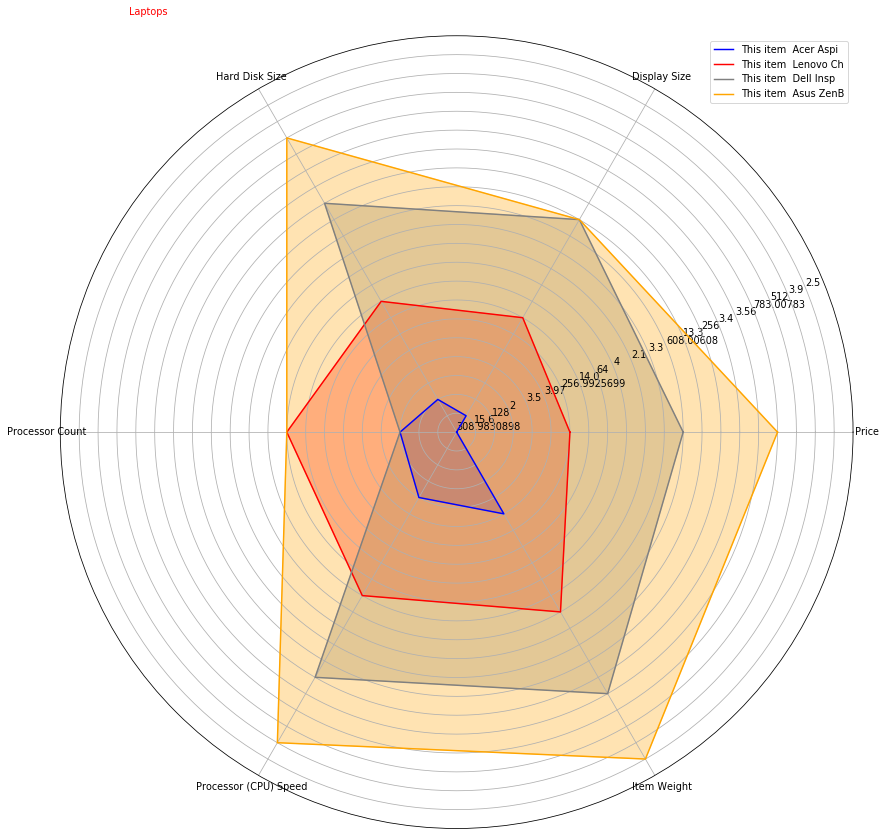

In [48]:
from math import pi
import matplotlib.pyplot as plt
%matplotlib inline
Attributes = attributes_to_ask
AttNo = len(Attributes)
plt.figure(
    figsize=(15, 15),
    dpi=70)
##################################################################################################
for laptop in range(laptops.shape[0]):
    #Find the values and angles 
    values = laptops.iloc[laptop].tolist()
    values += values [:1]

    angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
    angles += angles [:1]

    #Create the chart
    ax = plt.subplot(111, polar=True, )

    plt.xticks(angles[:-1],Attributes)

    ax.plot(angles,values, color=colors[laptop], label=laptops.iloc[laptop].name)
    ax.fill(angles, values, alpha=0.3, color=colors[laptop])
    ax.legend()
##################################################################################################
#Rather than use a title, individual text points are added
plt.figtext(0.2,0.9,"Laptops",color="red")
plt.show()